# Real Estate Project

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       502 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CRIM']

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

In [6]:
housing['CRIM'].value_counts()

0.01501     2
14.33370    2
0.03466     1
0.03113     1
0.03049     1
           ..
1.51902     1
1.83377     1
1.46336     1
1.27346     1
0.04741     1
Name: CRIM, Length: 504, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,502.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.287709,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704399,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.628000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

In [9]:
import matplotlib as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

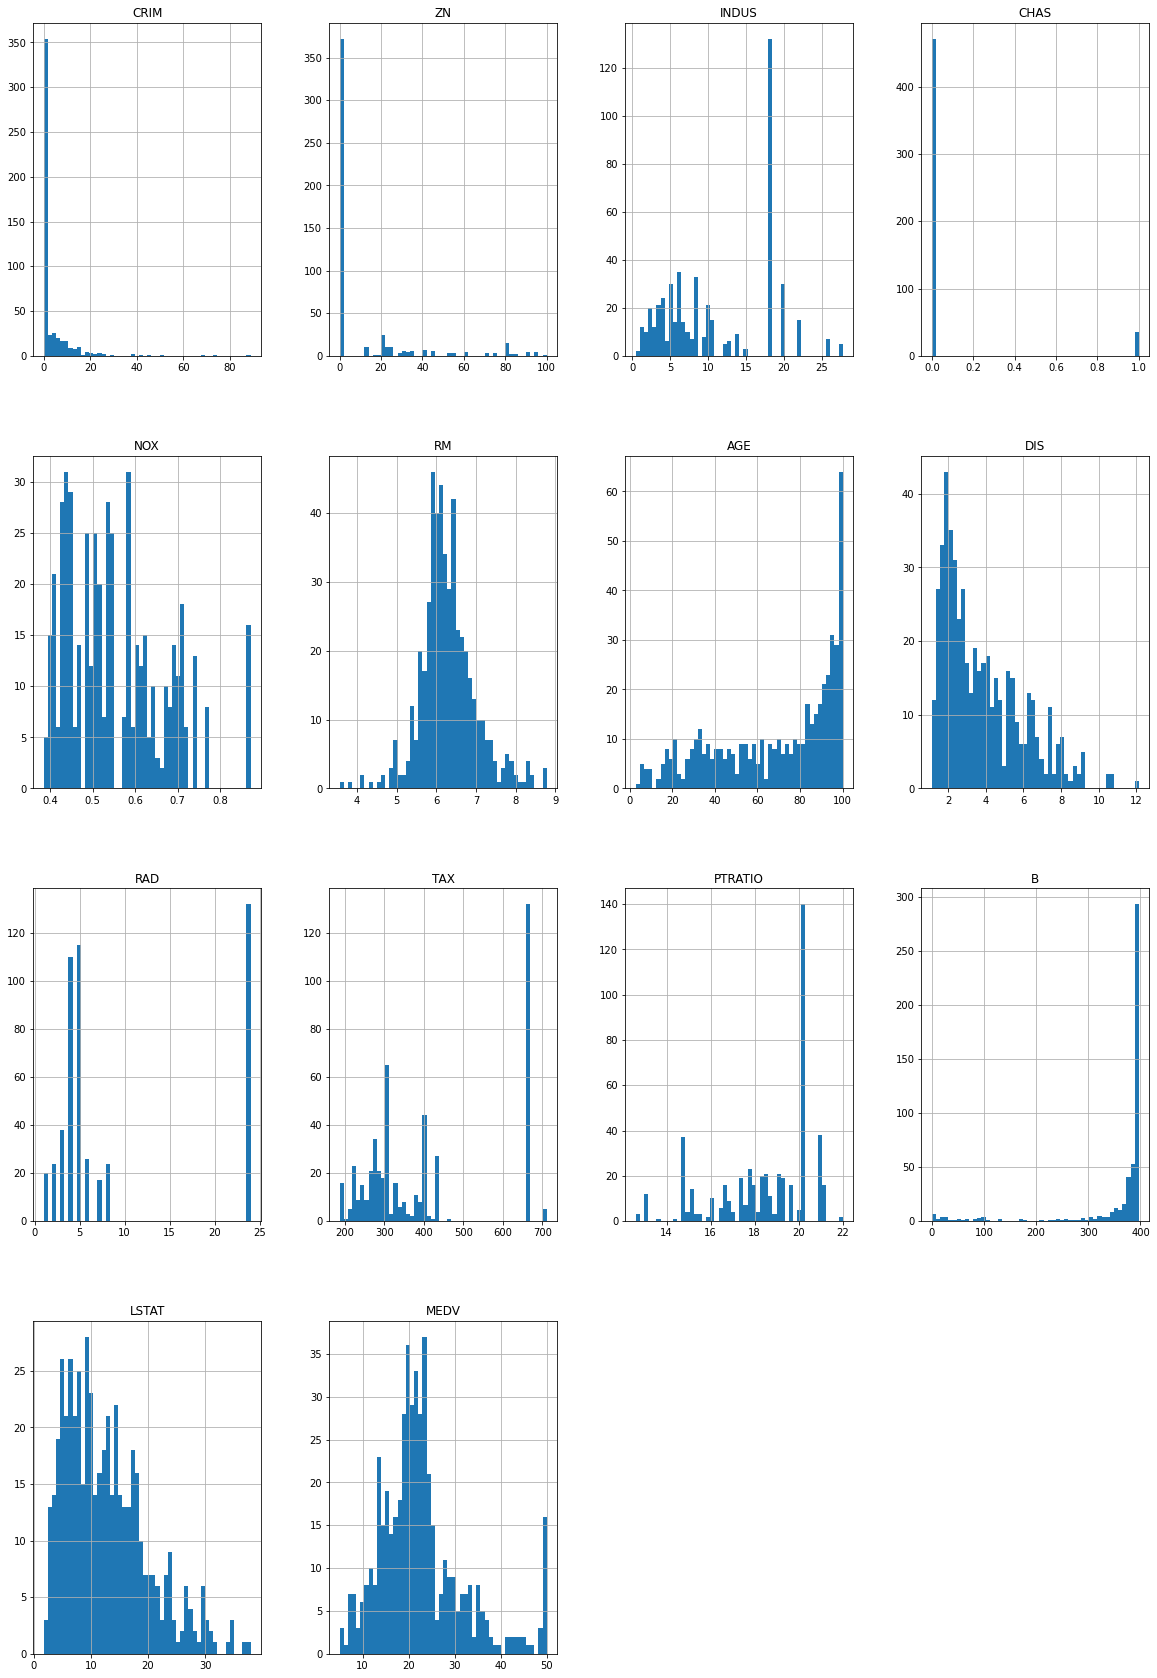

In [10]:
housing.hist(bins=50, figsize=(20,30))

## Train Test Splitting

In [11]:
import numpy as np
def split_traintest(data,test_ratio):
    np.random.seed(42) #to keep the test and train data same and avoid overfitting on multiple runs of data
    shuffled=np.random.permutation(len(data)) #shuffling the data
    test_set_size=int(len(data)*test_ratio)
    test_data=shuffled[:test_set_size]
    train_data=shuffled[test_set_size:]
    return data.iloc[train_data], data.iloc[test_data]

In [12]:
train_data, test_data=split_traintest(housing,0.2)

In [13]:
train_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
75,0.09512,0.0,12.83,0,0.4370,6.286,45.0,4.5026,5,398,18.7,383.23,8.94,21.4
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
15,0.62739,0.0,8.14,0,0.5380,NaN,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66,19.5
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00,21.1
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27,13.4


## split with sklearn

In [14]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing, test_size=0.2,random_state=42)
train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
15,0.62739,0.0,8.14,0,0.5380,NaN,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66,19.5
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00,21.1
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27,13.4


## stratified train test

In [15]:
##stratified train test should be done so that test and train datas show good representation in both test and train
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
split
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [16]:
strat_train_set
strat_train_set.describe()
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       401 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [17]:
strat_train_set['CHAS'].value_counts()


0    376
1     28
Name: CHAS, dtype: int64

In [18]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [19]:
376/28

13.428571428571429

In [20]:
95/7

13.571428571428571

In [21]:
# as you can see the distribution of CHAS is equal in both train and test using stratifiedshufflesplit
housing=strat_train_set

## looking for co-relations

In [22]:
corr_matrix=housing.corr()

In [23]:
corr_matrix['MEDV'].sort_values(ascending=False)#gives pearson coeff for all the values, as in how their change will affect MEDV

MEDV       1.000000
RM         0.679645
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [24]:
from pandas.plotting import scatter_matrix

In [25]:
attributes=['MEDV','RM','ZN','LSTAT']
#scatter_matrix(housing[attributes],figsize=(10,10),alpha=0.8)

In [26]:
#housing.plot(kind='scatter',x='RM',y='MEDV')

## Attribute Combinations

In [27]:
#lets say we create an attribute of our own for eg tax/crimerate

In [28]:
#housing['TAXCRIME']=housing['TAX']/housing['CRIM']

In [29]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0


In [30]:
corr_matrix2=housing.corr()
corr_matrix2['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679645
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [31]:
#housing['TAXAGE']=housing['TAX']/housing['AGE']
corr_matrix2=housing.corr()
corr_matrix2['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679645
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [32]:
## separating labels and features
housing=strat_train_set.drop('MEDV',axis=1)
housing_labels=strat_train_set['MEDV'].copy()

## Dealing with missing attributes

In [33]:
#3 ways to deal
#  1. remove the missing data points(if very few data points then can do)
#  2. remove the attribute with missing points(depends on co-relation)
#  3. insert either 0, mean, median in its place(jo zyada apt lge)

In [34]:
# droping data points where RM is NA
a=housing.dropna(subset='RM')
a.shape 

(401, 13)

In [35]:
#droping RM itself
a=housing.drop('RM',axis=1)
a.shape
#RM will be there no more and housing original is unchanged, to change in housing do inplace=True

(404, 12)

In [36]:
# replacing NA values with something else
#median=housing['RM'].median()
#housing['RM'].fillna(median)
#housing.shape

In [37]:
# Do the above using sklearn's imputer instead
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21600e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [38]:
X=imputer.transform(housing)
X.shape

(404, 13)

In [39]:
housing['RM'][7]

nan

In [40]:
housing_tr=pd.DataFrame(X, columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.282238,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712051,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## SciKit learn Design

There are 3 types of objects
1. Estimators- Estimates some values. Eg Imputer
It has fit method and transform method
Fit method- fits the dataset and calculates internal parameters
2. Transformers - transform method takes input and returns output based on the learnings from fit
It also has a convinience function, fit_transform
3. Predictors- Eg Linear regression Model, it has 2 functions fit and predict 


## Feature Scaling

1. Min Max Scaling-> value-min/(max-min)
    sklearn gives MinMaxScaler()
2. Standardisation-> (value-min)/std
    sklearn provides StandardScalar

## Creating a Pipeline

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('numpy',SimpleImputer(strategy='median')),('std_scaler',StandardScaler())])
# rather than applying all of them individually you can just make a pipeline and apply all this at once on the trainset of housing data
housing_num_tr=my_pipeline.fit_transform(housing) #this is an array
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Selecting a desired model for Dragon Real Estates

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=RandomForestRegressor()
#model=DecisionTreeRegressor()
model=LinearRegression()

model.fit(housing_num_tr,housing_labels)

LinearRegression()

In [64]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
prep_data=my_pipeline.transform(some_data)
prep_data

array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.24500176, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
         0.4960318 , -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
        -0.69277865,  0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
         0.2837053 ,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
         0.81196637,  0.44624347,  0.81480158],
       [-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.13184263, -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.81939807],
       [-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.04184994, -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.91902752]])

In [62]:
model.predict(prep_data)

array([23.95159544, 27.21073726, 20.58446946, 25.01499619, 23.74078069])

In [58]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [59]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels, housing_predictions)
rmse=np.sqrt(mse)
rmse

4.830924251885254

In [47]:
##as this is giving very high error rate we should change the model
## changes made above by commenting the lines
## as you can see, decision tree regressor gave 0.0 i.e. the model is overfitting which is wrong. Thus we won't take that data.

## Using better Eval techniques- Cross Validations

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import get_scorer_names
scores=cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)
rmse_scores
#get_scorer_names()

array([2.78660744, 2.70912314, 4.29300132, 2.55930679, 3.30655518,
       2.6477158 , 4.75211658, 3.28658929, 3.28179425, 3.16094814])

In [49]:
# you can see the rmse is lower now, lets try to find the same for linear regression model, changes made upar
def print_scores():
    print("Scores: ",rmse_scores)
    print("Mean: ",rmse_scores.mean())
    print("Deviation: ", rmse_scores.std())
print_scores()

Scores:  [2.78660744 2.70912314 4.29300132 2.55930679 3.30655518 2.6477158
 4.75211658 3.28658929 3.28179425 3.16094814]
Mean:  3.2783757925250248
Deviation:  0.685325928645423


In [50]:
from joblib import dump, load
dump(model, 'RealEstateDummy.joblib') 

['RealEstateDummy.joblib']

## Testing the Model

In [51]:
X_test=strat_test_set.drop('MEDV',axis=1)
Y_test=strat_test_set['MEDV'].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test, final_predictions)
final_rmse=np.sqrt(final_mse)
final_rmse
print(final_predictions,'\n',np.array(Y_test))


[24.72  11.472 25.275 22.061 18.145 15.151 19.929 14.726 31.551 40.723
 19.903 11.833 23.885 28.635 19.389 10.595 31.564 14.221 23.548 18.865
 19.829 17.811 17.225 21.929 18.368 30.537 16.102 32.67   8.962 33.557
 23.486 21.422 23.002 10.886 20.857 11.219 42.723 24.225 23.14  41.533
 23.823 29.539 20.705 20.886 19.727 33.449 44.666 19.923 20.265 21.85
 21.565 14.74  21.125 15.009 24.858 32.689 42.81  28.35  19.866 20.854
 47.453 10.063 18.69  24.413 14.776 32.951 19.581 18.072 19.061 33.82
 26.964 22.825 21.529 22.378 35.079 12.678 15.873 20.144 20.755 21.594
 22.    21.582 14.198 22.712 20.953 21.005 14.023 21.433 21.7   23.084
 18.835 27.297  7.213 26.244 18.644 29.826 19.648 31.118 14.558 26.46
 20.908 20.238] 
 [16.5 10.2 30.1 23.  14.4 15.6 19.4 14.1 30.3 35.2 23.1 13.8 25.  27.9
 19.5 12.3 32.2 13.5 23.8 21.7 19.2 19.5 10.4 23.2 18.6 28.5 15.2 32.
  7.2 34.6 20.1 20.6 23.6 13.1 23.8 12.7 43.1 24.7 22.2 44.  28.1 31.
 21.7 23.4 19.5 33.1 41.7 18.7 19.9 20.6 21.2 13.6 20.3 17.8 27.

In [52]:
prep_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24500176, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model


In [53]:
from joblib import dump, load
model = load('RealEstateDummy.joblib')
model.predict([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24500176, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])

array([22.437])

In [54]:
## Convert it to a .py file